In [69]:
import os

import kagglehub
import pandas as pd

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

if os.path.isdir(path):
    latest_version = max(os.listdir(path))
    path = os.path.join(path, latest_version)

df = pd.read_csv(path)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


**Описание датасета:**

Датасет содержит 6607 строк и 20 значений в каждой. Пропуски могут присутствовать в полях качество преподавания, уровень образования родителей и расстояние от дома до школы.

- Hours_Studied - Количество часов, потраченных на обучение (int) метрическая
- Attendance - Процент посещенных занятий (int) метрическая
- Parental_Involvement - Уровень участия родителей в образовании студента (Low, Medium, High) категориальная (номинальная)
- Access_to_Resources - Доступность образовательных ресурсов (Low, Medium, High). категориальная (номинальная)
- Extracurricular_Activities - Участие в дополнительных занятиях (Yes, No). категориальная (бинарная)
- Sleep_Hours - Среднее количество часов сна за ночь (int) метрическая
- Previous_Scores - Средние оценки предыдущих экзаменов (int) метрическая
- Motivation_Level - Уровень мотивации студента (Low, Medium, High). категориальная (номинальная)
- Internet_Access - Доступ в интернет (Yes, No). категориальная (бинарная)
- Tutoring_Sessions - Количество занятий с репетитором в месяц (int) метрическая
- Family_Income - Уровень дохода семьи (Low, Medium, High). категориальная (номинальная)
- Teacher_Quality - Качество преподавания учителями (Low, Medium, High). категориальная (номинальная), 78 пропусков
- School_Type - Тип школы (Public, Private). категориальная (номинальная)
- Peer_Influence - Влияние сверстников на академическую жизнь (Positive, Neutral, Negative). категориальная (номинальная)
- Physical_Activity - Среднее количество часов физической активности в неделю (int) метрическая
- Learning_Disabilities - Наличие проблем с обучаемостью (Yes, No). категориальная (бинарная)
- Parental_Education_Level - Образование родителей (High School, College, Postgraduate). категориальная (номинальная), 90 пропусков
- Distance_from_Home - Расстояние от дома до школы (Near, Moderate, Far). категориальная (номинальная), 67 пропусков
- Gender - пол студента (Male, Female). категориальная (номинальная)
- Exam_Score - Оценка за экзамен (int) метрическая

In [70]:
# Заменим типы данных на категориальные
cat_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
               'Motivation_Level', 'Internet_Access', 'Family_Income', 
               'Teacher_Quality', 'School_Type', 'Peer_Influence',
               'Learning_Disabilities', 'Parental_Education_Level',
               'Distance_from_Home', 'Gender']

for col in cat_columns:
    df[col] = df[col].astype('category')

In [71]:
# Создадим новый столбец, который будет отображать, как быстро набирается оценка за экзамен у конкретного студента
df['Efficiency'] = df['Exam_Score'] / df['Hours_Studied']

In [72]:
# Новая категориальная переменная, отвечающая за интенсивность обучения(времени, потраченного на обучение)
def categorize_hours(hours):
    if hours <= 10:
        return 'Low'
    elif hours <= 20:
        return 'Medium'
    else:
        return 'High'

df['Intensity'] = df['Hours_Studied'].apply(categorize_hours)

In [73]:
from scipy import stats

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

shapiro_results = {}

for column in numeric_columns:
    statistic, p_value = stats.shapiro(df[column])
    shapiro_results[column] = {
        'statistic': statistic,
        'p_value': p_value,
        'is_normal': p_value > 0.05
    }

results_df = pd.DataFrame(shapiro_results).T
results_df = results_df.round(4)

results_df['Вывод'] = results_df['is_normal'].map({
    True: 'Нормальное распределение',
    False: 'Распределение не нормальное'
})

print("\nРезультаты:")
print(results_df[['statistic', 'p_value', 'Вывод']].sort_values('p_value', ascending=False))


Результаты:
                  statistic p_value                        Вывод
Hours_Studied      0.997433     0.0  Распределение не нормальное
Previous_Scores    0.955421     0.0  Распределение не нормальное
Attendance         0.954794     0.0  Распределение не нормальное
Sleep_Hours        0.952896     0.0  Распределение не нормальное
Physical_Activity  0.921318     0.0  Распределение не нормальное
Exam_Score         0.902914     0.0  Распределение не нормальное
Tutoring_Sessions  0.890143     0.0  Распределение не нормальное
Efficiency         0.415955     0.0  Распределение не нормальное


/root/Sync/HSE/DataAnalysis/server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


/root/Sync/HSE/DataAnalysis/server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)
/root/Sync/HSE/DataAnalysis/server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)
/root/Sync/HSE/DataAnalysis/server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)
/root/Sync/HSE/DataAnalysis/server/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)
/roo

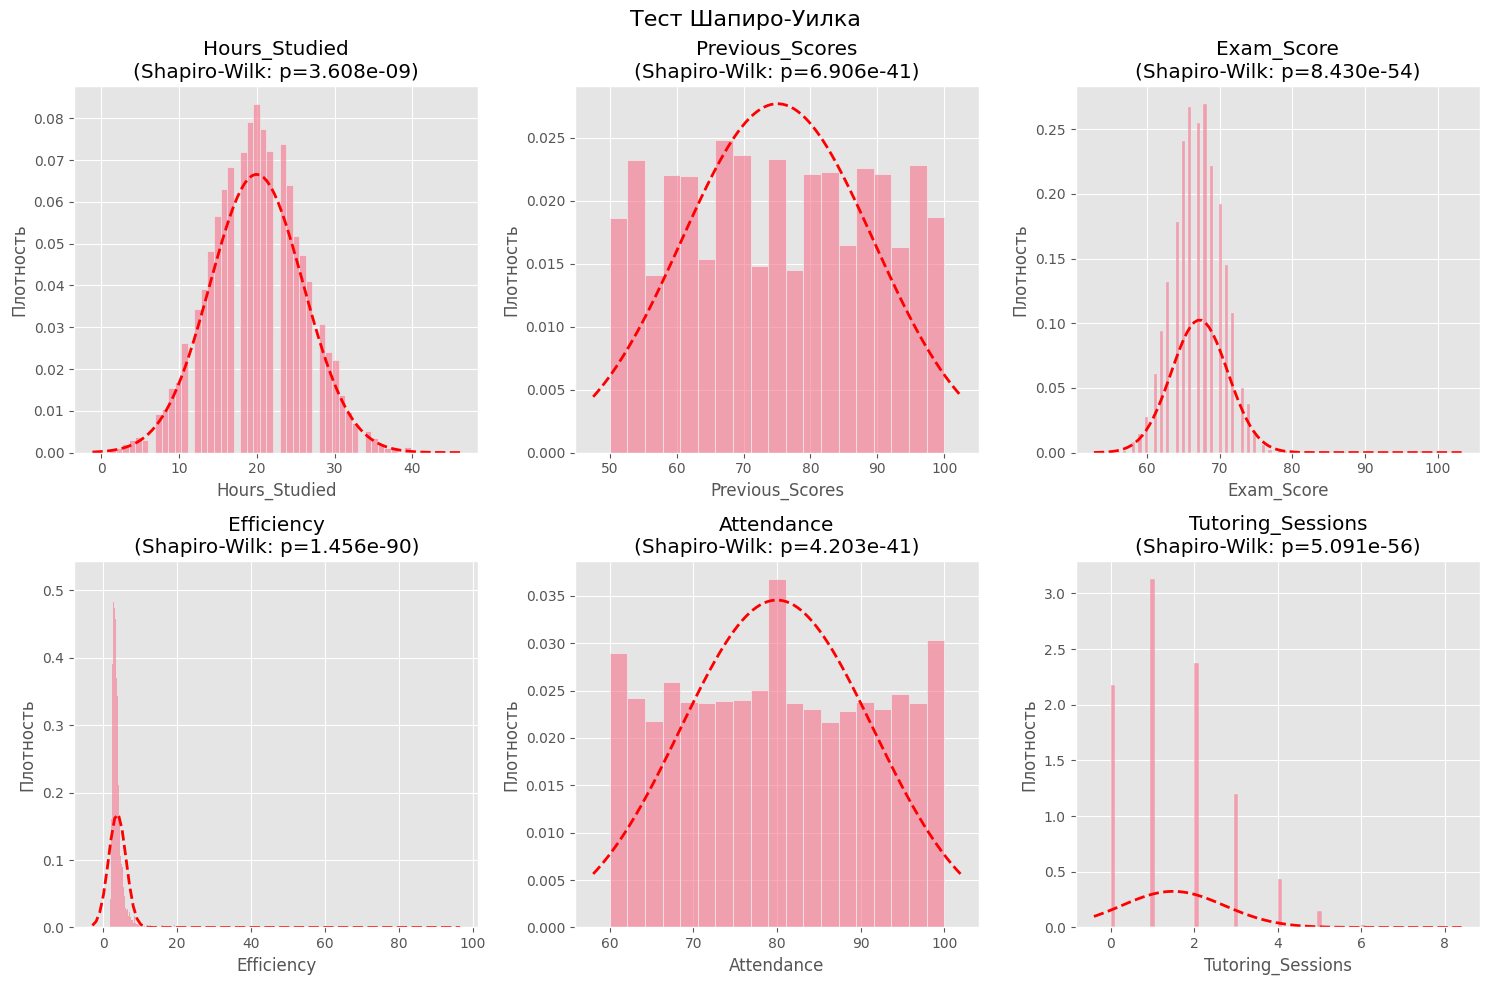

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle('Тест Шапиро-Уилка', fontsize=16)

variables = ['Hours_Studied', 'Previous_Scores', 'Exam_Score', 
            'Efficiency', 'Attendance', 'Tutoring_Sessions']

for ax, var in zip(axes.ravel(), variables):
    sns.histplot(data=df, x=var, stat='density', alpha=0.6, ax=ax)
    
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, sigma = df[var].mean(), df[var].std()
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y, 'r--', linewidth=2)
    
    stat, p_value = stats.shapiro(df[var])
    ax.set_title(f'{var}\n(Shapiro-Wilk: p={p_value:.3e})')
    
    ax.set_xlabel(var)
    ax.set_ylabel('Плотность')

plt.tight_layout()
plt.show()

# Ни одного нормального распределения нет, поэтому нужно использовать коэфиценты корреляции Кендалла(не Спирмана, т.к. много повторов и присутсвуют выбросы)

### Цель исследования:
Выявить ключевые факторы, влияющие на академическую успеваемость студентов, и определить их относительную важность.

### Задачи исследования:
1. Определить влияние временных затрат на обучение на итоговые результаты
2. Выявить роль социально-экономических факторов в успеваемости
3. Оценить влияние качества преподавания и доступности ресурсов
4. Исследовать взаимосвязь между физической активностью и академическими результатами
5. Определить влияние родительского участия на успеваемость

### Гипотезы:
H1: Существует положительная корреляция между количеством часов обучения и итоговой оценкой
Переменные: Hours_Studied, Exam_Score
Метод: Корреляционный анализ Пирсона

H2: Существует положительная корреляция между уровнем родительского участия и итоговой оценкой
Переменные: Parental_Involvement, Exam_Score
Метод: Однофакторный дисперсионный анализ (ANOVA)

H3: Существует положительная корреляция между доступностью образовательных ресурсов и итоговой оценкой
Переменные: Access_to_Resources, Exam_Score
Метод: Однофакторный дисперсионный анализ (ANOVA)

H4: Существует разница в успеваемости между государственными и частными школами
Переменные: School_Type, Exam_Score
Метод: Т-тест для независимых выборок

H5: Существует положительная корреляция между количеством часов сна и итоговой оценкой
Переменные: Sleep_Hours, Exam_Score
Метод: Корреляционный анализ

H6: Существует положительная корреляция между количеством занятий с репетитором и итоговой оценкой
Переменные: Tutoring_Sessions, Exam_Score
Метод: Корреляционный анализ

H7: Студенты с хорошими оценками в прошлом экзамене показывают лучшие результаты
Переменные: Previous_Scores, Exam_Score
Метод: Корреляционный анализ

H8: Существует корреляция между влиянием сверстников и итоговой оценкой
Переменные: Peer_Influence, Exam_Score
Метод: Однофакторный дисперсионный анализ (ANOVA)

H9: Сущетсвует корреляция между родительским образованием и итоговой оценкой
Переменные: Parental_Education_Level, Exam_Score
Метод: Однофакторный дисперсионный анализ (ANOVA)

H10: Существует корреляция между уровнем мотивации и итоговой оценкой
Переменные: Motivation_Level, Exam_Score
Метод: Однофакторный дисперсионный анализ (ANOVA)

Ps Везде я буду рассматривать влияние на оценку за экзамен, поэтому зависимая переменная будет метрической. Если вторая переменная номинальная, то я буду использовать однофакторный дисперсионный анализ (ANOVA), если бинарная, то t-тест для независимых выборок. Если метрическая, то корреляционный анализ Пирсона.

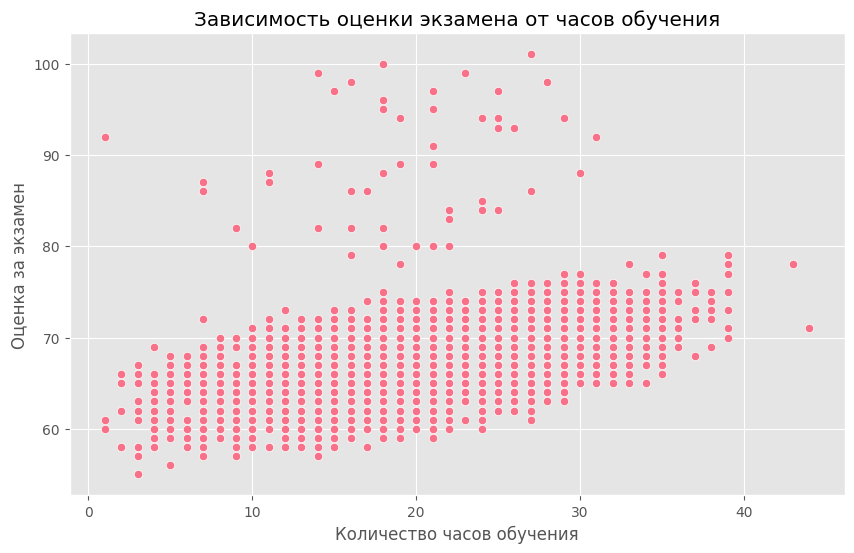

График рассеяния: Часы обучения vs Оценка экзамена.
Видно, что есть положительная корреляция между количеством часов обучения и итоговой оценкой.
Но разброс тоже не маленький, поэтому явно есть другие факторы, влияющие на оценку.


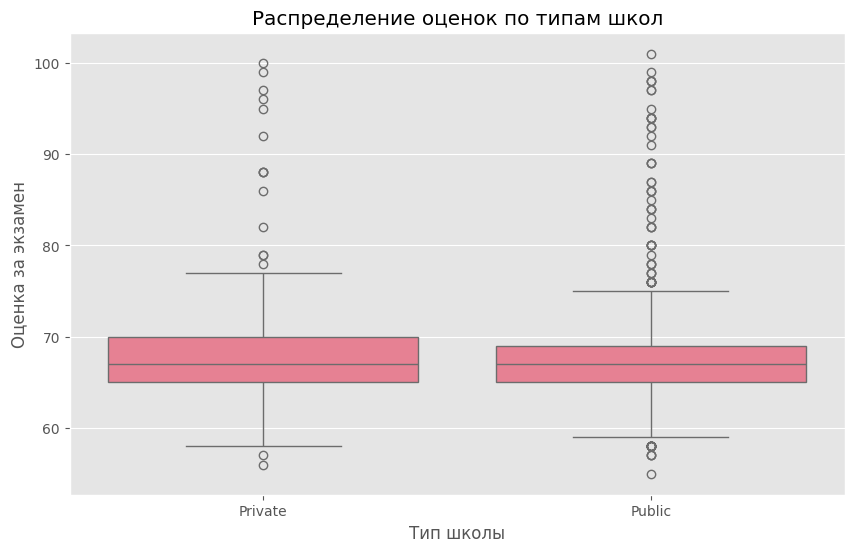

Boxplot: Оценки по типам школ.
Видно, что в частных школах оценки чуть-чуть выше, чем в государственных.
Выбросов больше в государственных школах, что связано с большим количеством студентов.
В целом талантливые студенты есть везде.


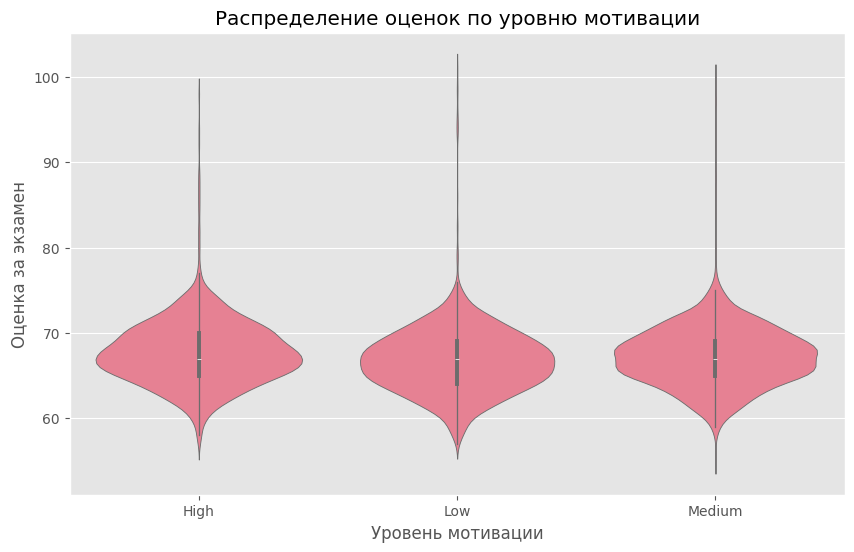

Violin plot: Оценки по уровню мотивации.
Особенных отличий между графиками нет, что заставляет предположить, что мотивация не влияет на оценку за экзамен.


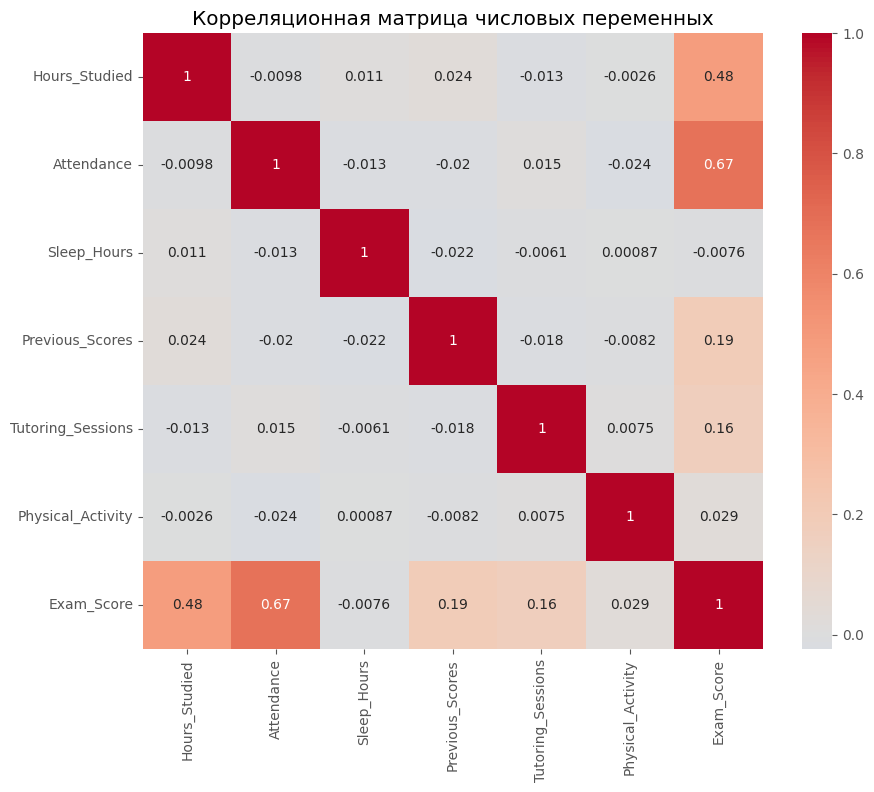

Корреляционная матрица числовых переменных.
Самые сильные корреляции находятся между оценкой за экзамен и количеством часов обучения, а также между оценкой за экзамен и посещаемостью занятий.
Также стоит отметить корреляцию между оценкой за экзамен и прошлыми оценками и оценкой и количеством занятий с репетитором.


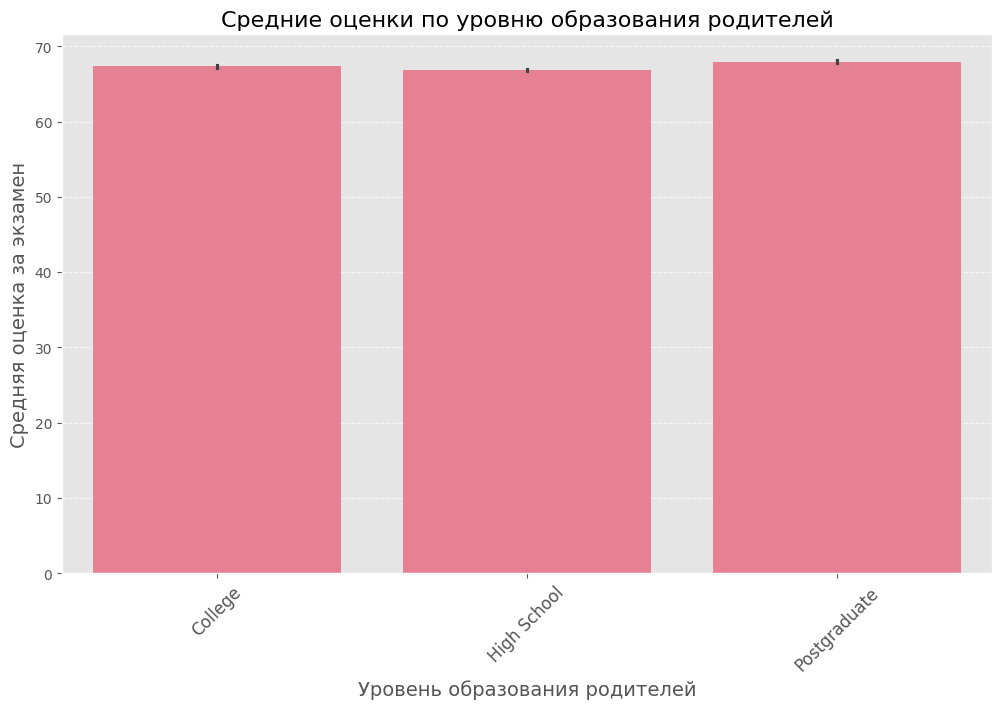

Средние оценки по уровню образования родителей.
Видно, что оценки за экзамен практически не отличаются между уровнями образования родителей.


In [75]:
plt.style.use('ggplot')
sns.set_palette("husl")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Зависимость оценки экзамена от часов обучения')
plt.xlabel('Количество часов обучения')
plt.ylabel('Оценка за экзамен')
plt.show()
print("График рассеяния: Часы обучения vs Оценка экзамена.")
print("Видно, что есть положительная корреляция между количеством часов обучения и итоговой оценкой.")
print("Но разброс тоже не маленький, поэтому явно есть другие факторы, влияющие на оценку.")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='School_Type', y='Exam_Score')
plt.title('Распределение оценок по типам школ')
plt.xlabel('Тип школы')
plt.ylabel('Оценка за экзамен')
plt.show()
print("Boxplot: Оценки по типам школ.")
print("Видно, что в частных школах оценки чуть-чуть выше, чем в государственных.")
print("Выбросов больше в государственных школах, что связано с большим количеством студентов.")
print("В целом талантливые студенты есть везде.")

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Motivation_Level', y='Exam_Score')
plt.title('Распределение оценок по уровню мотивации')
plt.xlabel('Уровень мотивации')
plt.ylabel('Оценка за экзамен')
plt.show()
print("Violin plot: Оценки по уровню мотивации.")
print("Особенных отличий между графиками нет, что заставляет предположить, что мотивация не влияет на оценку за экзамен.") 

numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                'Previous_Scores', 'Tutoring_Sessions', 
                'Physical_Activity', 'Exam_Score']
correlation_matrix = df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых переменных')
plt.show()
print("Корреляционная матрица числовых переменных.")
print("Самые сильные корреляции находятся между оценкой за экзамен и количеством часов обучения, а также между оценкой за экзамен и посещаемостью занятий.")
print("Также стоит отметить корреляцию между оценкой за экзамен и прошлыми оценками и оценкой и количеством занятий с репетитором.")

plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(data=df, x='Parental_Education_Level', y='Exam_Score')
plt.title('Средние оценки по уровню образования родителей', fontsize=16)
plt.xlabel('Уровень образования родителей', fontsize=14)
plt.ylabel('Средняя оценка за экзамен', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Средние оценки по уровню образования родителей.")
print("Видно, что оценки за экзамен практически не отличаются между уровнями образования родителей.")

По каждой сводной таблице видно, что статистически все параметры, добавленный в таблицу, влияют на оценку за экзамен, но разница исчисляется единицами.

In [76]:
from scipy.stats import chi2_contingency

table1 = pd.pivot_table(df, 
                       values='Exam_Score',
                       index='School_Type',
                       columns='Peer_Influence',
                       aggfunc='mean',
                       observed=False)
print("Таблица 1: Средние оценки по типу школы и влиянию сверстников")
print(table1.round(2))

table2 = pd.pivot_table(df,
                       values='Exam_Score',
                       index='Parental_Involvement',
                       columns='Family_Income',
                       aggfunc='mean',
                       observed=False)
print("\nТаблица 2: Средние оценки по родительскому участию в образовании и доходу семьи")
print(table2.round(2))

table3 = pd.pivot_table(df,
                       values='Exam_Score',
                       index='Extracurricular_Activities',
                       columns='Internet_Access',
                       aggfunc='mean',
                       observed=False)
print("\nТаблица 3: Средние оценки по внеучебной деятельности и доступу к интернету")
print(table3.round(2))

contingency_table = pd.crosstab(df['Peer_Influence'], df['Internet_Access'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nДанные подходят для теста Хи-квадрат, т.к переменные категориальные, наблюдения независимы, выборка достаточно большая.")

print("H0: Между влиянием сверстников и доступом к интернету нет связи.")
print("H1: Между влиянием сверстников и доступом к интернету есть связь.")

print("\nРезультаты теста Хи-квадрат:")
print(f"Статистика Хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("\nОтвергаем H0. Между влиянием сверстников и доступом к интернету есть связь.")
else:
    print("\nНе отвергаем H0. Между влиянием сверстников и доступом к интернету нет связи.")

Таблица 1: Средние оценки по типу школы и влиянию сверстников
Peer_Influence  Negative  Neutral  Positive
School_Type                                
Private            66.66    67.32     67.58
Public             66.52    67.14     67.64

Таблица 2: Средние оценки по родительскому участию в образовании и доходу семьи
Family_Income          High    Low  Medium
Parental_Involvement                      
High                  68.68  67.63   68.27
Low                   67.40  66.05   66.19
Medium                67.54  66.74   67.24

Таблица 3: Средние оценки по внеучебной деятельности и доступу к интернету
Internet_Access                No    Yes
Extracurricular_Activities              
No                          66.20  66.99
Yes                         66.75  67.50

Данные подходят для теста Хи-квадрат, т.к переменные категориальные, наблюдения независимы, выборка достаточно большая.
H0: Между влиянием сверстников и доступом к интернету нет связи.
H1: Между влиянием сверстников и доступо

In [77]:
# Статистики по всем числовым переменным
general_stats = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                    'Previous_Scores', 'Physical_Activity', 
                    'Exam_Score']].describe()
print("Общие описательные статистики:")
print(general_stats.round(2))
print("Студенты в среднем имеют хорошую успеваемость выше 50 баллов")

# Описательные статистики по типам школ
school_stats = df.groupby('School_Type', observed=False)['Exam_Score'].describe()
print("\nСтатистики по типам школ:")
print(school_stats.round(2))
print("В частных школах оценки чуть-чуть выше, чем в государственных.")

# Описательные статистики по влиянию сверстников
peer_influence_stats = df.groupby('Peer_Influence', observed=False)['Exam_Score'].describe()
print("\nСтатистики по влиянию сверстников:")
print(peer_influence_stats.round(2))
print("Чем лучше воздействие сверстников, тем выше оценка за экзамен.")

Общие описательные статистики:
       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count        6607.00     6607.00      6607.00          6607.00   
mean           19.98       79.98         7.03            75.07   
std             5.99       11.55         1.47            14.40   
min             1.00       60.00         4.00            50.00   
25%            16.00       70.00         6.00            63.00   
50%            20.00       80.00         7.00            75.00   
75%            24.00       90.00         8.00            88.00   
max            44.00      100.00        10.00           100.00   

       Physical_Activity  Exam_Score  
count            6607.00     6607.00  
mean                2.97       67.24  
std                 1.03        3.89  
min                 0.00       55.00  
25%                 2.00       65.00  
50%                 3.00       67.00  
75%                 4.00       69.00  
max                 6.00      101.00  
Студенты в среднем имею

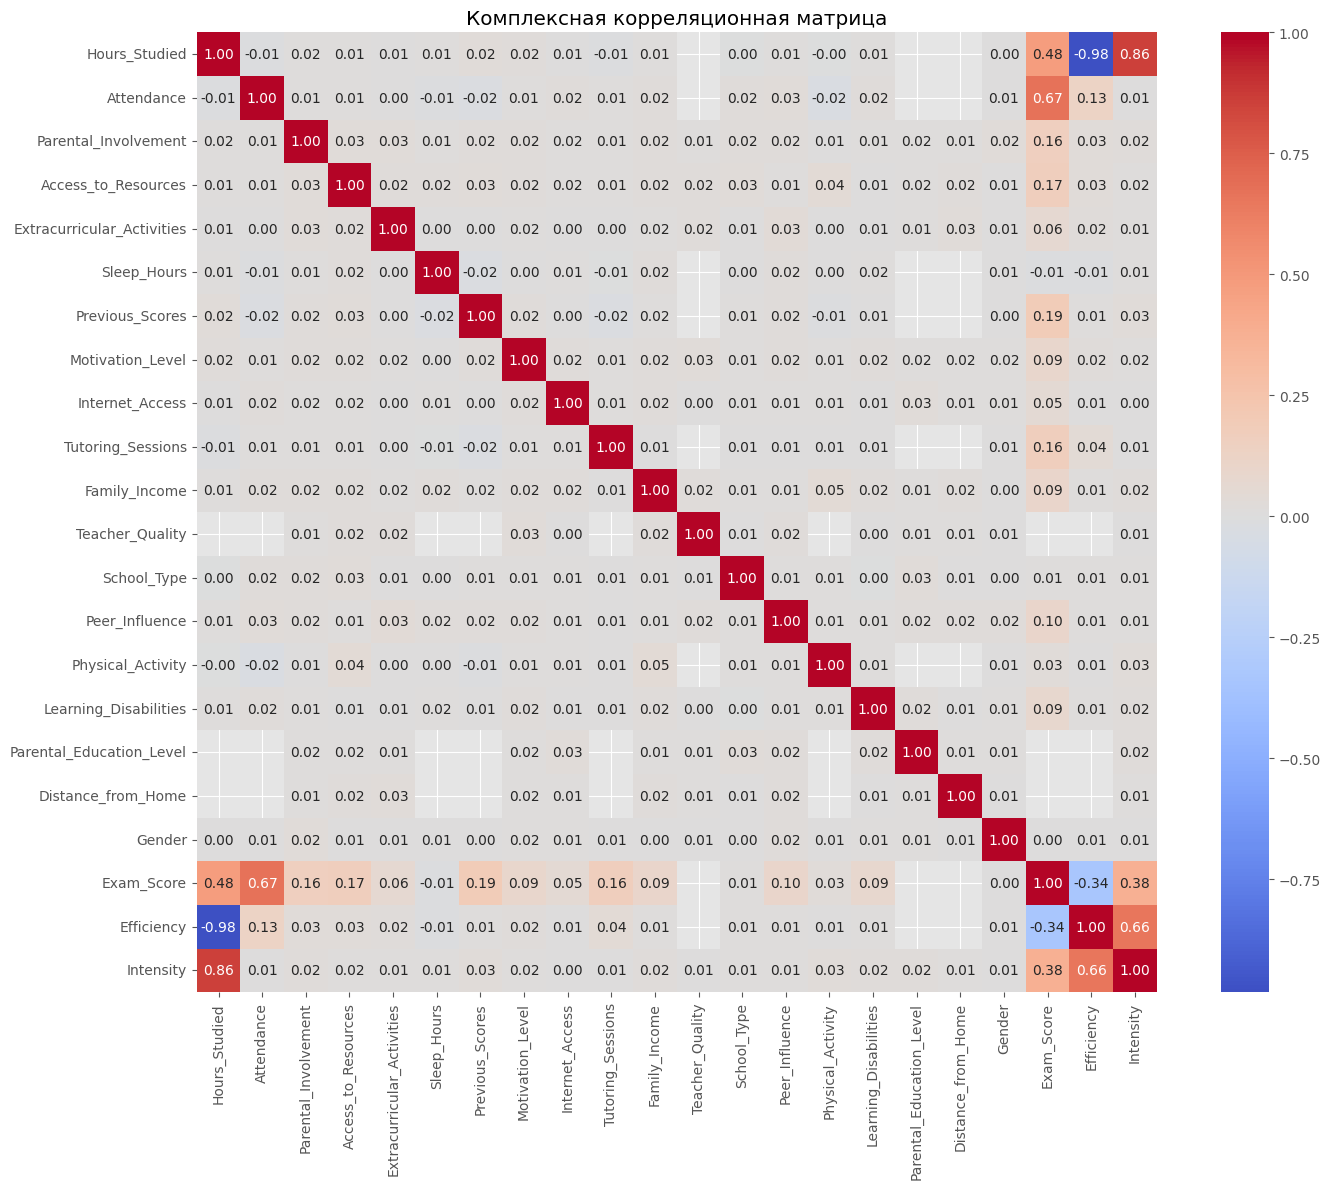

In [78]:
from scipy.stats import spearmanr

def cramers_v(x, y):
    """Вычисляет коэффициент V Крамера между двумя категориальными переменными"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def correlation_ratio(categorical, numerical):
    """Вычисляет корреляционное отношение между категориальной и числовой переменными"""
    categories = categorical.unique()
    means = [numerical[categorical == category].mean() for category in categories]
    total_mean = numerical.mean()
    ssb = sum(len(numerical[categorical == category]) * (mean - total_mean) ** 2 
              for category, mean in zip(categories, means))
    sst = sum((numerical - total_mean) ** 2)
    return np.sqrt(ssb / sst)

def calculate_correlation(x, y, x_type, y_type):
    """Вычисляет корреляцию между двумя переменными в зависимости от их типов"""
    if x_type == 'numerical' and y_type == 'numerical':
        return spearmanr(x, y)[0]
    elif x_type == 'categorical' and y_type == 'categorical':
        return cramers_v(x, y)
    else:
        if x_type == 'numerical':
            return correlation_ratio(y, x)
        else:
            return correlation_ratio(x, y)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

variable_types = {col: 'numerical' if col in numerical_cols else 'categorical' 
                 for col in df.columns}

n_vars = len(df.columns)
correlation_matrix = np.zeros((n_vars, n_vars))

for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i <= j:
            correlation = calculate_correlation(
                df[col1], df[col2],
                variable_types[col1],
                variable_types[col2]
            )
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation

correlation_df = pd.DataFrame(
    correlation_matrix,
    index=df.columns,
    columns=df.columns
)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_df, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True)
plt.title('Комплексная корреляционная матрица')
plt.tight_layout()
plt.show()

Видно, что если не брать в рассчет составные переменные, самые большие корреляции всё так же у часов обучения и посещаемости, а категориальные переменные между собой практически не коррелируют.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 
        'Tutoring_Sessions', 'Physical_Activity']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nКоэффициент детерминации (R²): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Коэффициенты модели:
Hours_Studied: 0.2891
Attendance: 0.1988
Previous_Scores: 0.0483
Tutoring_Sessions: 0.5102
Physical_Activity: 0.1507

Коэффициент детерминации (R²): 0.6422
RMSE: 2.2488


Часы обучения: за каждый час обучения оценка за экзамен увеличивается на 0.2891 балла. Сильная положительная зависимость.
Посещаемость: за каждый процент посещаемости оценка за экзамен увеличивается на 0.1988 балла. Сильная положительная зависимость.
Прошлые оценки: за каждый балл средней прошлой оценки оценка за экзамен увеличивается на 0.04383 балла. Слабая положительная зависимость.
Количество занятий с репетитором: за каждое занятие оценка за экзамен увеличивается на 0.5101 балла. Сильная положительная зависимость.
Физическая активность: за каждый час физической активности оценка за экзамен увеличивается на 0.1507 балла. Сильная положительная зависимость.

R² = 0.6422 - 64% предсказывается моделью, неплохое значение.
RMSE = 2.2488 - среднее отклонение предсказаний от фактических значений.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Будем предсказывать будет ли ученик отличником.
df['High_Score'] = (df['Exam_Score'] > 70).astype(int)

X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 
        'Tutoring_Sessions', 'Physical_Activity']]
y = df['High_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\nМетрики качества модели:")
print(classification_report(y_test, y_pred))

odds_ratios = np.exp(model.coef_[0])
print("\nОтношения шансов:")
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: {odds:.4f}")

Коэффициенты модели:
Hours_Studied: 0.3005
Attendance: 0.1982
Previous_Scores: 0.0492
Tutoring_Sessions: 0.5218
Physical_Activity: 0.1552

Метрики качества модели:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1090
           1       0.79      0.66      0.72       232

    accuracy                           0.91      1322
   macro avg       0.86      0.81      0.83      1322
weighted avg       0.91      0.91      0.91      1322


Отношения шансов:
Hours_Studied: 1.3505
Attendance: 1.2192
Previous_Scores: 1.0505
Tutoring_Sessions: 1.6851
Physical_Activity: 1.1679


Каждый из предикатов положительно влияет на вероятность стать отличником. Так же репетиторство и посещаемость имеют больший вес, чем другие предикаты.

У модели хорошая точность 0.91. Модель хорошо предсказывает более успешных студентов, это должно быть связано со спецификой данных, в которых преобладают более высокие оценки.

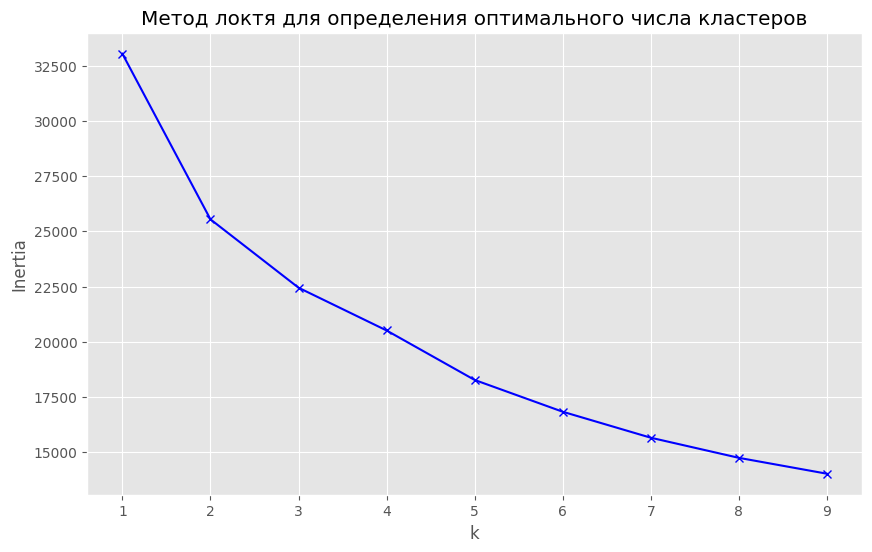

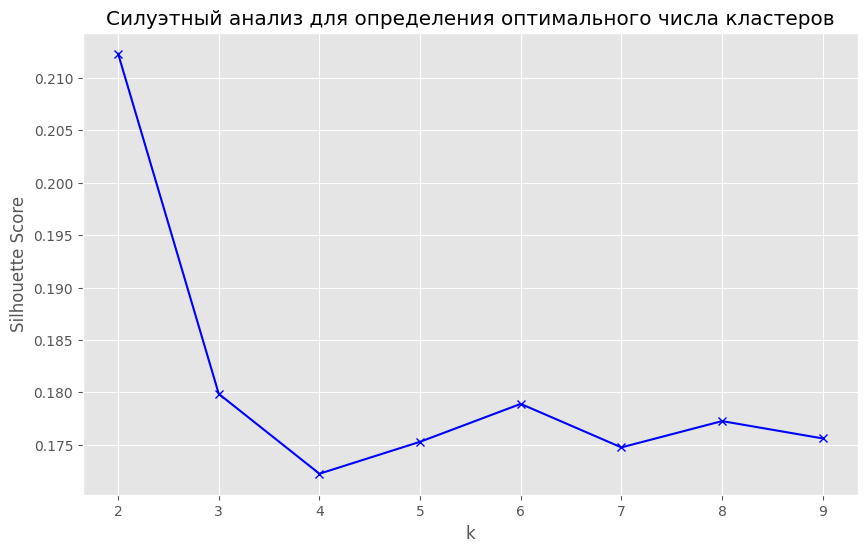

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['Hours_Studied', 'Attendance', 'Previous_Scores', 
                         'Physical_Activity', 'Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_clustering])

inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Силуэтный анализ для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

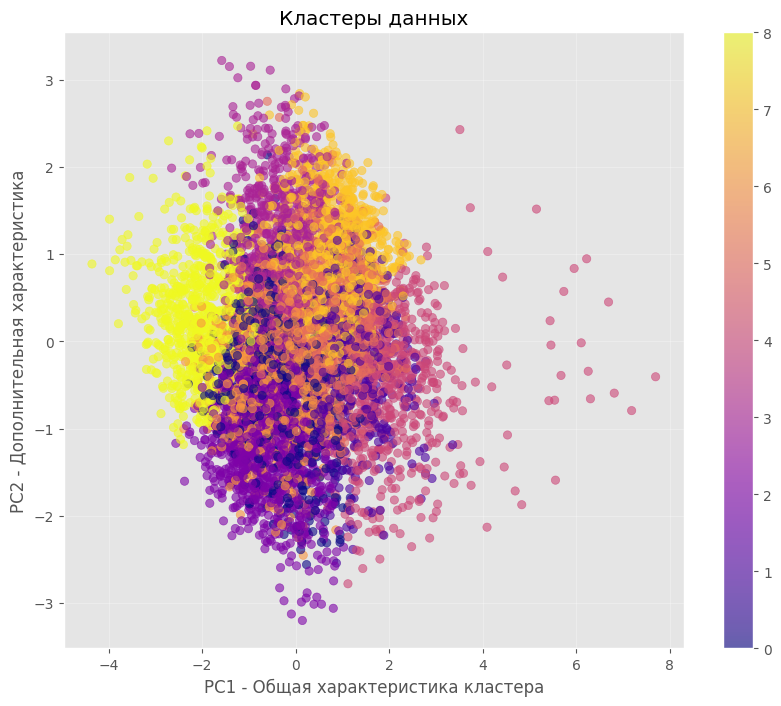

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=kmeans.labels_,
                     cmap='plasma',
                     alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('PC1 - Общая характеристика кластера')
plt.ylabel('PC2 - Дополнительная характеристика')
plt.title('Кластеры данных')
plt.grid(True, alpha=0.3)
plt.show()

По графикам видно, что оптимальное число кластеров равно 3, т.к. после третьего кластера силуэтный коэффициент меняется уже незначительно.

In [84]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = df.groupby('Cluster')[features_for_clustering].mean()
print("\nСредние значения по кластерам:")
print(cluster_means)

cluster_counts = df['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(df)) * 100
print("\nПроцент студентов в каждом кластере:")
print(cluster_percentages)


Средние значения по кластерам:
         Hours_Studied  Attendance  Previous_Scores  Physical_Activity  \
Cluster                                                                  
0            18.034531   74.762483        61.924872           3.017266   
1            22.356969   90.635332        76.201783           2.938412   
2            19.114228   72.398297        87.785571           2.950401   

         Exam_Score  
Cluster              
0         64.594494  
1         70.666126  
2         65.829659  

Процент студентов в каждом кластере:
Cluster
1    37.354321
0    32.435296
2    30.210383
Name: count, dtype: float64


0 кластер - бездельники с низким посещением, временем на учёбу и плохими старыми оценками, но высокой физической активностью.

1 кластер - отличники, посещающие занятия, изучающие материал и имеющие хорошие оценки.

2 кластер - скатывающиеся вниз студенты, с низким посещением, временем на учёбу, но высокими старыми оценками.

Пройдёмся по всем гипотезам:

H1: количество часов обучения влияет на оценку за экзамен как главный предикат в обеих регрессиях.

H2: родительское участие в образовании практически не влияет на оценку за экзамен, это было доказано в графиках и сводных таблицах.

H3: влияния доступности образовательных ресурсов не было выявлено.

H4: разницы между государственными и частными школами практически нет(десятые доли), это было доказано в графиках и сводных таблицах.

H5: влияния количества сна не было выявлено.

H6: количество занятий с репетитором очень сильно влияет на оценку за экзамен, это был главный предикат в регрессиях.

H7: влияние прошлых оценок не было выявлено.

H8: влияние сверстников очень слабо влияет на оценку за экзамен, сводные таблицы дали разницу чуть больше 1 процента.

H9: родительское образование не влияет на оценку за экзамен, это было доказано в графиках.

H10: мотивация практически не влияет на оценку за экзамен, это было доказано в графиках.

Цель исследования явно достигнута, регрессионные модели показывают хорошие результаты и подсвечивают главные предикаты.

Мне показалось неожиданным, что практически ничего кроме посещения и услуг репетиторства глобально не влияет на оценку за экзамен.
Все социально экономические факторы вместе влияют меньше, чем репетиторство.
Отсутствие влияния родительского участия и образования меня очень удивило, но я думаю эти факторы сопряжены с использованием услуг репетиторства.

Продолжение по ссылке: https://github.com/w1sq/data_science_project